# Podstawy przetwarzania sygnałów - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    Proszę nie rozpowszechniać plików z zajęć - z góry dziękuję :)

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

### Natalia Zielonka 253068

Proszę wpisać swoje dane po dwukrotnym kliknięciu myszką w komórkę. Dokładnie tam gdzie jest imię wpisujecie swoje imię itd.!

## Zajęcia 5

1. Decymacja - przypomnienie.
2. Aliasing - czym jest i jak interpretować.
3. FT a FFT. Czy zawsze występują różnice w uzyskanym widmie?
4. Przeciek widma - co oprócz aliasingu. Kiedy występuje?
5. Spektrogram jako narzędzie do analizy czasowo-częstotliwościowej.

Co przygotować w domu na następne zajęcia?

1. Przeanalizować wszystko o czym rozmawialiśmy dzisiaj (uwaga! będę pytać losowo wybrane osoby)
2. Rozumieć i umieć samodzielnie napisać to co było do tej pory na zajęciach
3. Dokończyć zadania z tego notebooka
___

## Zanim przejdziecie dalej uruchomcie komórkę poniżej

In [3]:
% pkg install -forge signal
pkg load signal

## Przypomnienie z poprzednich zajęć oraz trochę większy łyk teorii

## Transformata Fouriera

Cyfrowe sygnały mogą być analizowane w dziedzinie czasu oraz w dziedzinie częstotliwości. Algorytmy działające w dziedzinie czasu operują bezpośrednio na próbkach cyfrowego sygnału. Analiza częstotliwościowa sygnału, stosowana w wielu operacjach cyfrowego przetwarzania sygnałów, polega na przekształceniu sygnału z dziedziny czasu do dziedziny częstotliwości. Widmo sygnału (ang. spectrum) to reprezentacja częstotliwościowa sygnału, często mówi się więc o analizie widmowej.

Jean-Baptiste Joseph Fourier odkrył, że dowolny sygnał okresowy można przedstawić w postaci szeregu Fouriera, czyli sumy sygnałów trygonometrycznych (kosinusów i sinusów) o różnych amplitudach i częstotliwościach. Operację przekształcenia sygnału z dziedziny czasu do dziedziny częstotliwości nazywa się transformatą Fouriera. Wynik tego przekształcenia jest częstotliwościową reprezentację sygnału, ponieważ pokazuje nam z jakich częstotliwości składa się sygnał. Na podstawie N próbek sygnału otrzymujemy N wartości widmowych, pokrywających zakres od 0 do  fs , gdzie  fs  jest częstotliwością próbkowania, a  fs/2  jest częstotliwością Nyquista.

Ciągłą transformatę Fouriera definiujemy wzorem:

${\hat {f}}(\omega )=\int \limits _{-\infty }^{\infty }f(t)e^{-i\omega t}dt$

a transformatę odwrotną (IFT):

$ {\hat {f}}(\omega )= \frac{1}{2 \pi} \int \limits _{-\infty }^{\infty }f(t)e^{i\omega t}dt$


W przypadku sygnałów cyfrowych mówimy o dyskretnym przekształceniu Fouriera (DFT - Discrete Fourier Transform). Dyskretną Transformatę Fouriera możemy zdefiniować wzorem:

$ A_{k}=\sum _{n=0}^{N-1}{a_{n}w_{N}^{-kn}},\ 0\leqslant k\leqslant N-1,$

a przekształcenie odwrotne (IDFT):

$a_{n}={\frac {1}{N}}\sum _{k=0}^{N-1}{A_{k}w_{N}^{kn}},\ 0\leqslant n\leqslant N-1,$ gdzie

i – jednostka urojona,
$k$ – numer harmonicznej,
$n$– numer próbki sygnału,
$a_{n}$ – wartość próbki sygnału,
$N$ – liczba próbek.

**W praktyce nie oblicza się transformaty z definicji, stosuje się algorytm szybkiego przekształcenia Fouriera (FFT - Fast Fourier Transform). W naszym przypadku korzystać będziemy z funkcji **fft( )** do obliczenia transformaty oraz funkcji **stem( )** do jej wyrysowania.**

## Pytanie 1
Skoro FT przenosi nasz sygnał z dziedziny czasu do dziedziny częstotliwości to sygnał w jakiej dziedzinie otrzymamy stosując IFT na widmie sygnału?


**ODPOWIEDŹ:** 


TUTAJ JEST MIEJSCE NA NAPISANIE ODPOWIEDZI




In [1]:
% zoom FFT

% figure
% stem(freq(1:250), abs_ft_sig_2(1:250), '.')
% xlabel('czestotliwosc [Hz]')
% ylabel('Modul widma')
% title('zoom na fragment modulu widma - pierwsze 250 próbek')

### Zadanie 1

Krótkie typowo akademickie zadanie na rozruszanie z poprzednich zajęć ;)

Stwórz sygnał, który został zdefiniowany wzorem podanym poniżej. Załóż, że $f_s = 2000 Hz$ oraz długość trwania sygnału $1[s]$.

$ s(t) = 5sin(2\pi13t) + 8cos(40\pi t) +3sin(2\pi 198t)$

Wyrysuj przebieg w czasie oraz widmo amplitudowe tego sygnału. Pamiętaj o opisaniu osi. Na podstawie swojej wiedzy oraz wygenerowanych wykresów odpowiedz na pytania:
 - Czy częstotliwości zdefiniowane we wzorze są zgodne z tym co widzimy na wykresie widma amplitudowego?
 - Dlaczego w zakresie $f \in (0, fs)$ mamy dwa razy więcej prążków niż składowych?

**Wskazówka:** aby dokładnie odczytać wartości częstotliwości (jeśli nie działa lupa) można posłużyć się fragmentem kodu podanym przed tym zadaniem (zoom widma). Uwaga! Proszę podać poprawne numery indeksów próbek, które chcecie aktualnie oglądać! (1:250) jest tylko przykładem ;)


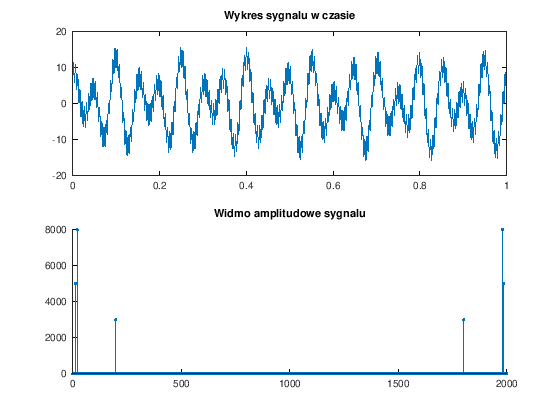

In [1]:
% tutaj jest miejsce na napisanie kodu

fs=2000;
delta_t=1/fs;
t=0:delta_t:1-delta_t;

sig=5*sin(2*pi*13*t)+8*cos(40*pi*t)+3*sin(2*pi*198*t);

fft_sig=fft(sig);
abs_fft_sig=abs(fft_sig);
f_step=fs/length(fft_sig);
f=0:f_step:fs-f_step;

figure
subplot(2,1,1);
plot(t,sig);
title("Wykres sygnalu w czasie");

subplot(2,1,2);
stem(f,abs_fft_sig, '.');
title("Widmo amplitudowe sygnalu");



**ODPOWIEDŹ:**


TUAJ NAPISZ ODPOWIEDZ




### Decymacja

Pojęcie decymacji znane jest nie tylko w dziedzinie przetwarzania sygnałów. Spójrzmy na sprawę trochę szerzej i zobaczmy jak definiowane jest w Wikipedii:

 > **Decymacja (łac. decimatio dziesiątkowanie)** – kara stosowana w armiach starożytnych oraz w niektórych wojskach nowożytnych państw autorytarnych polegająca na zabiciu co dziesiątego żołnierza ukaranego oddziału.

Hmm, sami przyznacie, że nie brzmi to zbyt optymistycznie. Przejdźmy zatem do definicji związanej z naszym przedmiotem.

>**Decymacja** – przekształcenie sygnału dyskretnego, polegające na zachowaniu co ${\displaystyle M}$-tej próbki, a odrzuceniu pozostałych. Oznaczając sygnał wejściowy jako ${\displaystyle s_{x},}$ a sygnał wyjściowy jako ${\displaystyle s_{y},}$ możemy zapisać decymację w następujący sposób:
$${\displaystyle s_{y}(n)=s_{x}(Mn).}{\displaystyle s_{y}(n)=s_{x}(Mn).}$$
Parametr ${\displaystyle M}$ jest nazywany współczynnikiem decymacji.


**PYTANIE**

Jeśli współczynnik decymacji wynosi $n$ to co się zmieni dla sygnału $s(t) = A \sin(2 \pi ft)$ przy założeniu, że wektor czasu został zdefiniowany dla częstotliwościowi próbkowania równej $fs$?


**ODPOWIEDź**

Tutaj napisz odpowiedź




### Zadanie 2

Wyznacz maksymalny rząd decymacji sygnału z zadania 1, a następnie wyrysuj przebieg w czasie oraz widmo zdecymowanego sygnału.
W jaki sposób wyznaczyć maksymalny współczynnik decymacji? Co się stanie kiedy wybierzemy zbyt duży rząd decymacji? Jakie twierdzenie musimy mieć ciągle w głowie aby nie utracić informacji o składowych znajdujących się w sygnale?


In [5]:
% help fft
% help abs
% helpo stem

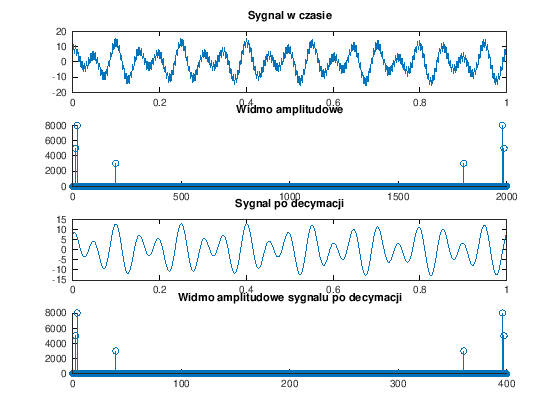

In [7]:
% tutaj jest miejsce na napisanie kodu
fs=2000;
delta_t=1/fs;
t=0:delta_t:1-delta_t;

sig1=5*sin(2*pi*13*t)+8*cos(40*pi*t)+3*sin(2*pi*198*t);

abs_fft_sig1=abs(fft(sig1));
f_step1=fs/length(abs_fft_sig1);
f1=0:f_step1:fs-f_step1;

%decymacja
max_dec=floor(fs/(2*198));

sig2=decimate(sig,max_dec);

fs_dec=fs/max_dec;
delta_t_dec=1/fs_dec;
t1=0:delta_t_dec:1-delta_t_dec;

dec_abs_fft_sig2=abs(fft(sig1));
f_step2=fs_dec/length(dec_abs_fft_sig2);
f2=0:f_step2:fs_dec-f_step2;

figure
subplot(4,1,1);
plot(t,sig1);
title("Sygnal w czasie");

subplot(4,1,2);
stem(f1,abs_fft_sig1);
title("Widmo amplitudowe");

subplot(4,1,3);
plot(t1,sig2);
title("Sygnal po decymacji");

subplot(4,1,4);
stem(f2,dec_abs_fft_sig2);
title("Widmo amplitudowe sygnalu po decymacji");


**ODPOWIEDŹ:**



## Aliasing

Wiemy już, że transformata Fouriera w zakresie $f \in (0, fs)$ pokazuje nam oprócz prążki w częstotliwościach sygnału jak również odbite czyli przy wartościach $f_s-f_n$. Przy poprawnie wybranej częstotliwości próbkowania możemy swobodnie odseparować od siebie dwie części. Jednak jeśli będziemy zmniejszać częstotliwość próbkowania, to w pewnym momencie dojdziemy do takiej sytuacji, w której widma zaczną się stykać ze sobą. Następnie kiedy nie będzie już spełnione twierdzenie Shanona zaczną nachodzić na siebie. Nachodzenie na siebie widm spowoduje, że w tym zakresie wspólnym (nałożonym) nie jesteśmy w stanie określić jaką wartość przyjmie sygnał. Zjawisko to nazywamy aliasingiem. O ile nakładanie się widma omówiliśmy już częściowo na poprzednich i dzisiejszych zajęciach to warto pomyśleć o tym jak zjawisko aliasingu będzie wyglądało w przebiegu czasowym. Poniżej rysunek - przeanalizujcie co widzicie.

![Aliasing](https://livesound.pl/images/3/3/8/338-1013rys.jpg)


### Zadanie 3
Dla sygnału z zadania 1 wykorzystaj rząd decymacji, który będzie większy niż wyznaczony przez Ciebie - przetestuj kilka przypadków. Wyrysuj przebieg częstotliwościowy sygnału i dokonaj analizy. Pamiętaj o opisaniu osi.

Co widzisz na rysunku? Czy otrzymane częstotliwości są zgodne z podanymi w treści zadania pierwszego? Jak brzmi twierdzenie, z którego będziesz korzystać aby nie wystąpiły takie błędy jak w tym zadaniu?


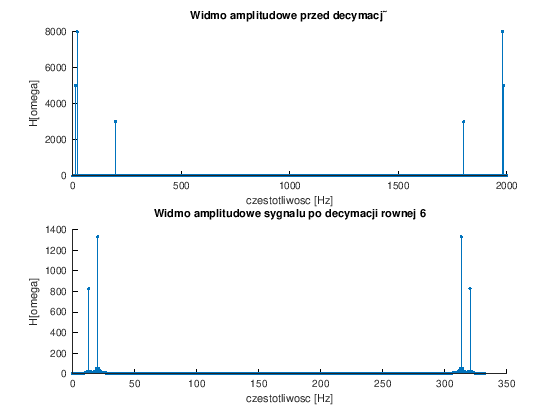

In [11]:
% tutaj jest miejsce na napisanie kodu

fs=2000;
delta_t=1/fs;
t1=0:delta_t:1-delta_t;

sig=5*sin(2*pi*13*t)+8*cos(40*pi*t)+3*sin(2*pi*198*t);

abs_fft_sig=abs(fft(sig));
f_step1=fs/length(abs_fft_sig);
f1=0:f_step1:fs-f_step1;

%decymacja

max_dec=6;

sig2=decimate(sig,max_dec);

fs_dec=fs/max_dec;
delta_t_dc=1/fs_dec;
t2=0:delta_t_dc:1-delta_t_dc;

dc_abs_fft_sig2=abs(fft(sig2)); 
f_step2=fs_dec/length(dc_abs_fft_sig2);
f2=0:f_step2:fs_dec-f_step2;

figure
subplot(2,1,1);
stem(f1,abs_fft_sig, '.');
title("Widmo amplitudowe przed decymacją");
xlabel("czestotliwosc [Hz]");
ylabel("H[\omega]");

subplot(2,1,2);
stem(f2,dc_abs_fft_sig2, '.');
title("Widmo amplitudowe sygnalu po decymacji rownej 6");
xlabel("czestotliwosc [Hz]");
ylabel("H[\omega]");


**ODPOWIEDŹ:**

Dla zbyt dużej składowej decymacji, może zniknąć składowa sygnału, została ona wycięta przez filtr aliasingowy, bo prążki nałożyły się na siebie. Zeby wykluczyć takie sytuacje musimy pamiętać o tw shanona

## FT a FFT
Szybka transformata Fouriera jest bardziej efektywnym algorytmem obliczania TF. Podstawowe wywołanie funkcji fft ma postać `fft(x,Nf)` gdzie `Nf` to długość transformaty. Funkcja fft realizuje algorytm FFT, jeśli Nf jest potęgą dwójki. W innych przypadkach realizowany jest algorytm DFT. Jeśli sygnał ma N próbek i N nie jest potęgą dwójki to nadal możemy wykorzystać algorytm FFT - w takim przypadku na końcu sygnału zostaną doklejone zera.

### Pytanie 2

Jeśli nasz sygnał ma:
- a) 1000 próbek,
- b) 1025 próbek

to jaką długość transformaty powinniśmy wybrać?

Zakładając, że $f_s = 500 [Hz]$ jaka będzie rozdzielczość* widma w obu przypadkach?

\*rozdzielczość rozumieć należy jako odległość między prążkami widma dyskretnego uzyskanego w wyniku transformacji Fouriera


**ODPOWIEDŹ:**

**a)**

długość transformaty będzie wynosić:1024

rozdzielczość transformaty wynosi:

**b)**

długość transformaty będzie wynosić:2048

rozdzielczość transformaty wynosi:

___

### Miejsce na notatki


Tutaj możesz zapisać wszystko co potrzebujesz do tego, aby nie zapomnieć o czym dzisiaj rozmawiamy


Śmiało korzystaj z tej przestrzeni i dowolnie ją modyfikuj :)


-
-
-
-




___

## Zadanie 4
Napisz fragment kodu, w którym wykreślisz dwa widma sygnału z zadania 1. Pierwszy z nich niech będzie klasycznym algorytmem TF, a drugi niech wykorzystuje FFT. Porównaj wyniki widm amplitudowych. Co możesz zaobserwować? Kiedy wynik FFT będzie taki sam jak FT?

Wskazówka (do ostatniego pytania): Stwórz nowy wektor czasu i sygnał (skopiuj fragment zadania 1) i sprawdź czy występują różnice dla sygnału o długości 1024 czy 2048.

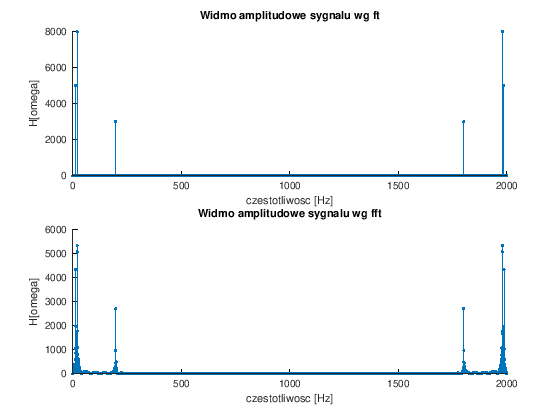

In [15]:
% tutaj jest miejsce na napisanie kodu

fs=2000;
delta_t=1/fs;
t=0:delta_t:1-delta_t;

sig=5*sin(2*pi*13*t)+8*cos(40*pi*t)+3*sin(2*pi*198*t);

abs_fft_sig_tf=abs(fft(sig));
f_step1=fs/length(abs_fft_sig_tf);
f1=0:f_step1:fs-f_step1;

abs_fft_sig_fft=abs(fft(sig,2048));
f_step2=fs/length(abs_fft_sig_fft);
f2=0:f_step2:fs-f_step2;

figure
subplot(2,1,1);
stem(f1,abs_fft_sig_tf, '.');
title("Widmo amplitudowe sygnalu wg ft");
xlabel("czestotliwosc [Hz]");
ylabel("H[\omega]");

subplot(2,1,2);
stem(f2,abs_fft_sig_fft, '.');
title("Widmo amplitudowe sygnalu wg fft");
xlabel("czestotliwosc [Hz]");
ylabel("H[\omega]");


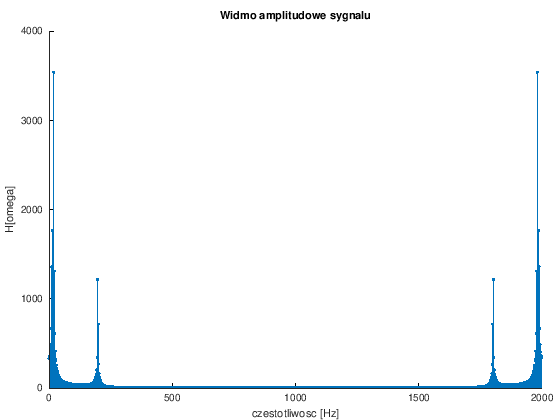

In [14]:
fs=2000;
delta_t=1/fs;
t_p=1024;
t=0:delta_t:t_p*delta_t-delta_t;


sig=5*sin(2*pi*13*t)+8*cos(40*pi*t)+3*sin(2*pi*198*t);

abs_fft_sig=abs(fft(sig));
f_step=fs/length(abs_fft_sig);
f=0:f_step:fs-f_step;


figure
stem(f,abs_fft_sig, '.');
title("Widmo amplitudowe sygnalu");
xlabel("czestotliwosc [Hz]");
ylabel("H[\omega]");

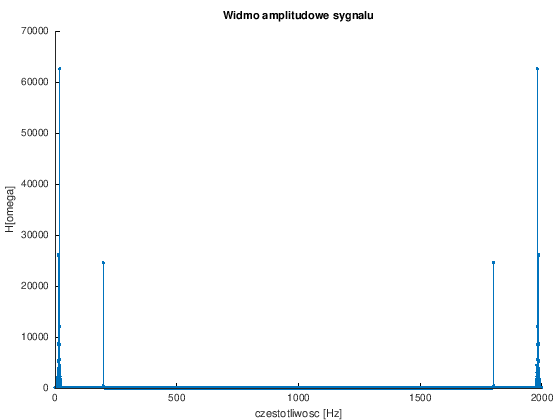

In [16]:
fs=2000;
delta_t=1/fs;
t_p=16384;
t=0:delta_t:t_p*delta_t-delta_t;


sig=5*sin(2*pi*13*t)+8*cos(40*pi*t)+3*sin(2*pi*198*t);

abs_fft_sig=abs(fft(sig));
f_step=fs/length(abs_fft_sig);
f=0:f_step:fs-f_step;


figure
stem(f,abs_fft_sig, '.');
title("Widmo amplitudowe sygnalu");
xlabel("czestotliwosc [Hz]");
ylabel("H[\omega]");


**Odpowiedź:**
Dostrzegalny jest wyciek widma dla FFT. FFT i FT będą równe gdy liczba okresów sygnału będzie liczbą całkowitą w danym czasie.

## Przeciek widma

Przeciek widma (rozmycie się prążków) występuje w następujących przypadkach:
- gdy N(długość transformaty) nie jest potęgą dwójki
- gdy występuje nieciągłość związana z okresami
- aliasing- gdy częstotliwość próbkowania nie jest co najmniej dwa razy większa od maksymalnej częstotliwości sygnału
- n



## Spektrogram

W przypadku gdy nie wystarcza tylko znajomość struktury czasowej sygnału (wykres czasowy) lub  częstotliwościowej (widmo policzone z całego sygnału), należy przeprowadzić analizę czasowo-częstotliwościową. Sytuacja taka występuje dla przykładu przy analizie sygnału mowy. Wynik takiej analizy ma postać trójwymiarowego wykresu, w którym zmiennymi niezależnymi są czas i częstotliwość, a zmienną zależną jest wartością funkcji (moc/energia sygnału) dla danego punktu czasu i częstotliwości. Częściej wykres taki przedstawia się w postaci obrazu, w którym na osi poziomej znajduje się czas, na pionowej częstotliwość, a moc sygnału zobrazowana jest przy pomocy odcieni szarości lub kolorów. Obraz taki nosi nazwę **spektrogramu**.
Do wyliczenia spektrogramu korzystać będziemy z funkcji **`spectrogram()`**.

In [10]:
% help spectrogram

### Zadanie 5

Wczytaj do sygnał `czepek.wav` a następnie wyrysuj jego spektrogram.

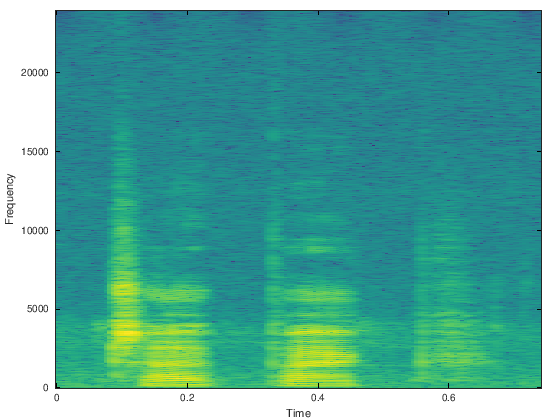

In [17]:
% tutaj jest miejesce na napisanie kodu

[x, Fs] = audioread("czepek.wav"); 
step = fix(5*Fs/1000);     # one spectral slice every 5 ms
window = fix(40*Fs/1000);  # 40 ms data window
fftn = 2^nextpow2(window); # next highest power of 2
specgram(x, fftn, Fs, window, window-step);


### Zadanie 6

Wczytaj do sygnał `sig_3.mat`, a następnie wyrysuj jego spektrogram. Co to za sygnał? Co możesz powiedzieć o zmianie jego częstotliwości w czasie? Jak nazywa się taki sygnał?

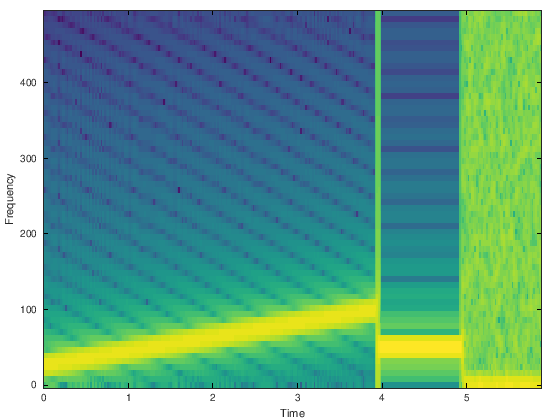

In [19]:
% tutaj jest miejsce na napisanie kodu

load('sig_3.mat');  # freq. sweep from 0-500 over 2 sec.
Fs=1000;                  # sampled every 0.001 sec so rate is
step=ceil(20*Fs/1000);    # one spectral slice every 20 ms
window=ceil(100*Fs/1000); # 100 ms data window
specgram(sig_3, 2^nextpow2(window), Fs, window, window-step);


**ODPOWIEDŹ:**


TUTAJ NAPISZ ODPOWIEDŹ do ZADANIA 6



___

**A na koniec - kilka dodatkowych słów odnośnie spektrogramów (dla ciekawskich):**

Okazuje się, że nie można uzyskać dowolnie wysokiej rozdzielczości w obu dziedzinach: czasu i częstotliwości. Dziedziny te powiązane są ze sobą w taki sposób, że gdy w jednej zwiększamy rozdzielczość, w drugiej następuje jej spadek. Wynika to z zasady nieoznaczoności, której odmiana znana jest w fizyce kwantowej.

_________